In [2]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
from tensorflow.keras.optimizers import RMSprop
from tensorflow import keras
from tensorflow.keras import Model
import os
import tensorflow as tf
import scipy
import matplotlib.pyplot as plt
import numpy as np
import cv2

2022-05-31 00:08:46.299742: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-05-31 00:08:46.299765: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [3]:
train = ImageDataGenerator(rescale = 1/255)
validation = ImageDataGenerator(rescale = 1/255)

In [5]:
train_data = train.flow_from_directory('resources/Data/',
                                         target_size = (100,100),
                                         batch_size = 100,
                                         class_mode = 'binary')

validation_dataset = train.flow_from_directory('resources/validation/',
                                         target_size = (100,100),
                                         batch_size = 100,
                                         class_mode = 'binary')

FileNotFoundError: [Errno 2] No such file or directory: 'resources/Data/'

In [4]:
train_data.class_indices

{'non-vehicles': 0, 'vehicles': 1}

In [5]:
model = tf.keras.models.Sequential([tf.keras.layers.Conv2D(16,(3,3),activation = 'relu',input_shape = (100,100,3)), 
                                    tf.keras.layers.MaxPool2D(2,2),
                                    #
                                    tf.keras.layers.Conv2D(32,(3,3),activation = 'relu'), 
                                    tf.keras.layers.MaxPool2D(2,2),
                                    #
                                    tf.keras.layers.Conv2D(64,(3,3),activation = 'relu'), 
                                    tf.keras.layers.MaxPool2D(2,2),
                                    ## 
                                    tf.keras.layers.Flatten(),
                                    ##
                                    tf.keras.layers.Dense(512,activation='relu'),
                                    ##
                                    tf.keras.layers.Dense(1,activation='sigmoid')
])

In [6]:
model.compile(loss='binary_crossentropy',
            optimizer = RMSprop(learning_rate=0.001),
            metrics= ['accuracy'])

In [7]:
model_fit = model.fit(train_dataset,
                      batch_size = 1500,
                      epochs = 3,
                     validation_data = validation_dataset)

#model_fit = model.fit(train_dataset, batch_size=32, epochs=10, verbose=1)

Epoch 1/3
177/177 [==============================] - 67s 373ms/step - loss: 0.3671 - accuracy: 0.8520 - val_loss: 0.1675 - val_accuracy: 0.9138
Epoch 2/3
177/177 [==============================] - 68s 387ms/step - loss: 0.1176 - accuracy: 0.9598 - val_loss: 1.0783 - val_accuracy: 0.7586
Epoch 3/3
177/177 [==============================] - 71s 401ms/step - loss: 0.0667 - accuracy: 0.9772 - val_loss: 0.1201 - val_accuracy: 0.9914


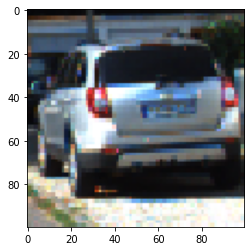

1/1 [==============================] - 0s 117ms/step
a car


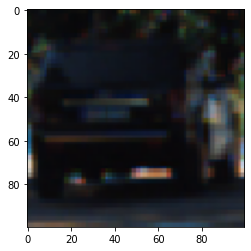

1/1 [==============================] - 0s 24ms/step
a car


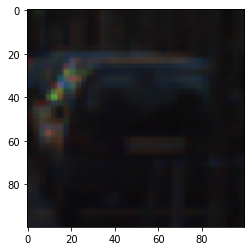

1/1 [==============================] - 0s 35ms/step
a car


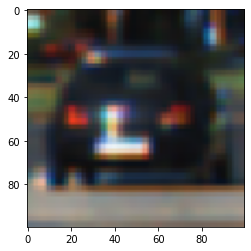

1/1 [==============================] - 0s 32ms/step
a car


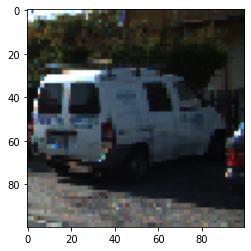

1/1 [==============================] - 0s 19ms/step
a car


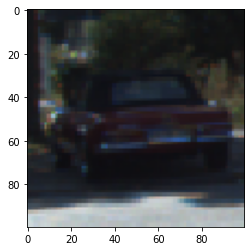

1/1 [==============================] - 0s 33ms/step
a car


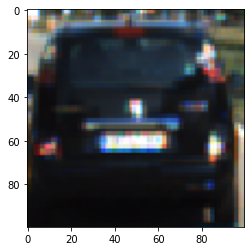

1/1 [==============================] - 0s 22ms/step
a car


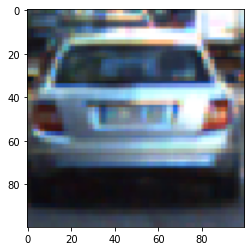

1/1 [==============================] - 0s 19ms/step
a car


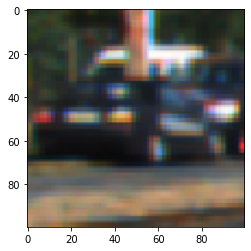

1/1 [==============================] - 0s 30ms/step
a car


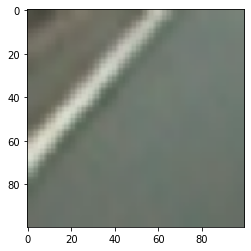

1/1 [==============================] - 0s 26ms/step
not a car


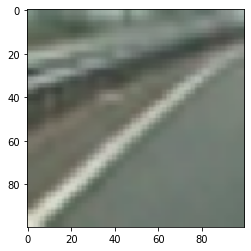

1/1 [==============================] - 0s 25ms/step
not a car


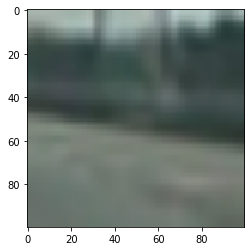

1/1 [==============================] - 0s 20ms/step
not a car


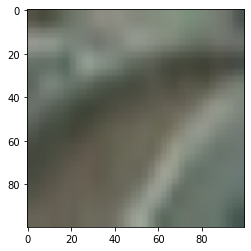

1/1 [==============================] - 0s 17ms/step
not a car


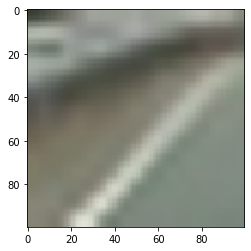

1/1 [==============================] - 0s 32ms/step
not a car


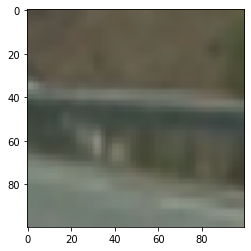

1/1 [==============================] - 0s 36ms/step
not a car


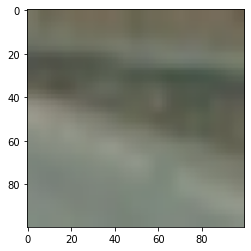

1/1 [==============================] - 0s 25ms/step
not a car


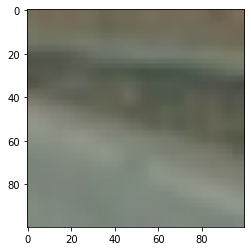

1/1 [==============================] - 0s 25ms/step
not a car


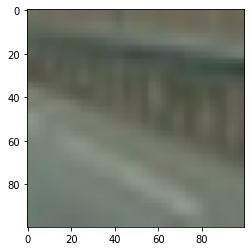

1/1 [==============================] - 0s 31ms/step
not a car


In [8]:
dir_path = 'resources/test/'

for i in os.listdir(dir_path):
    img = image.load_img(dir_path+'//'+i,target_size=(100,100))
    plt.imshow(img)
    plt.show()
    
    x = image.img_to_array(img)
    x = np.expand_dims(x,axis = 0)
    images = np.vstack([x])
    
    val = model.predict(images)
    if val == 0 :
        print("not a car")
    else:
        print("a car") 
    